In [2]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
# 🔹 STEP 2: Load the Dataset
df = pd.read_csv("wine.csv")
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# STEP 3: Basic EDA
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

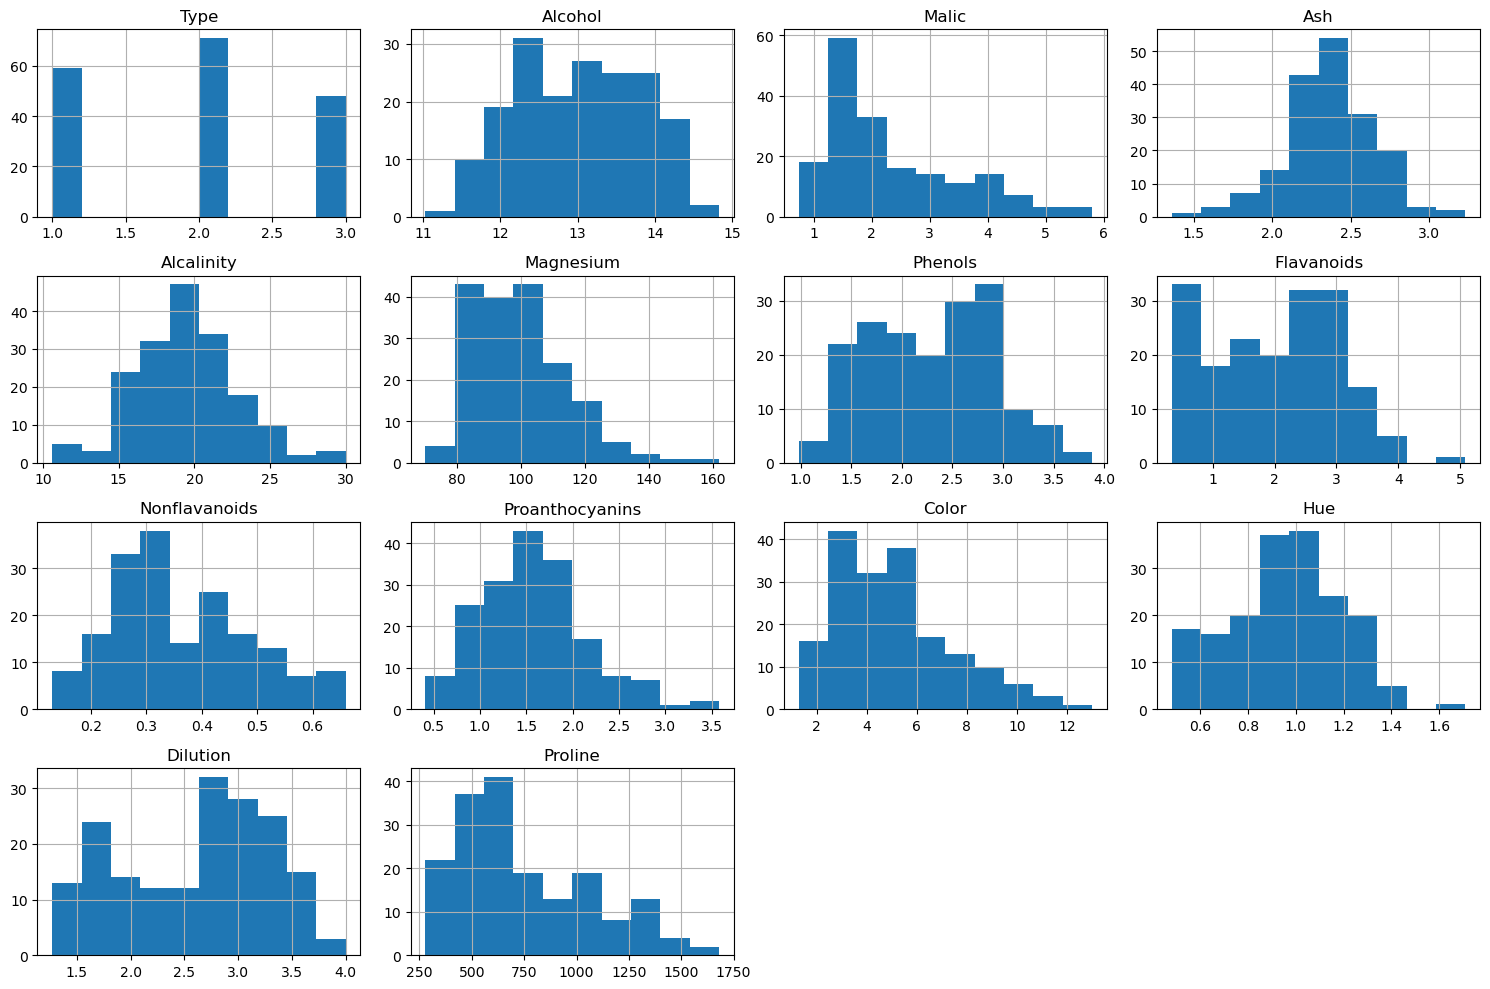

In [5]:
# STEP 4: Feature Distribution (EDA)
# Histograms
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


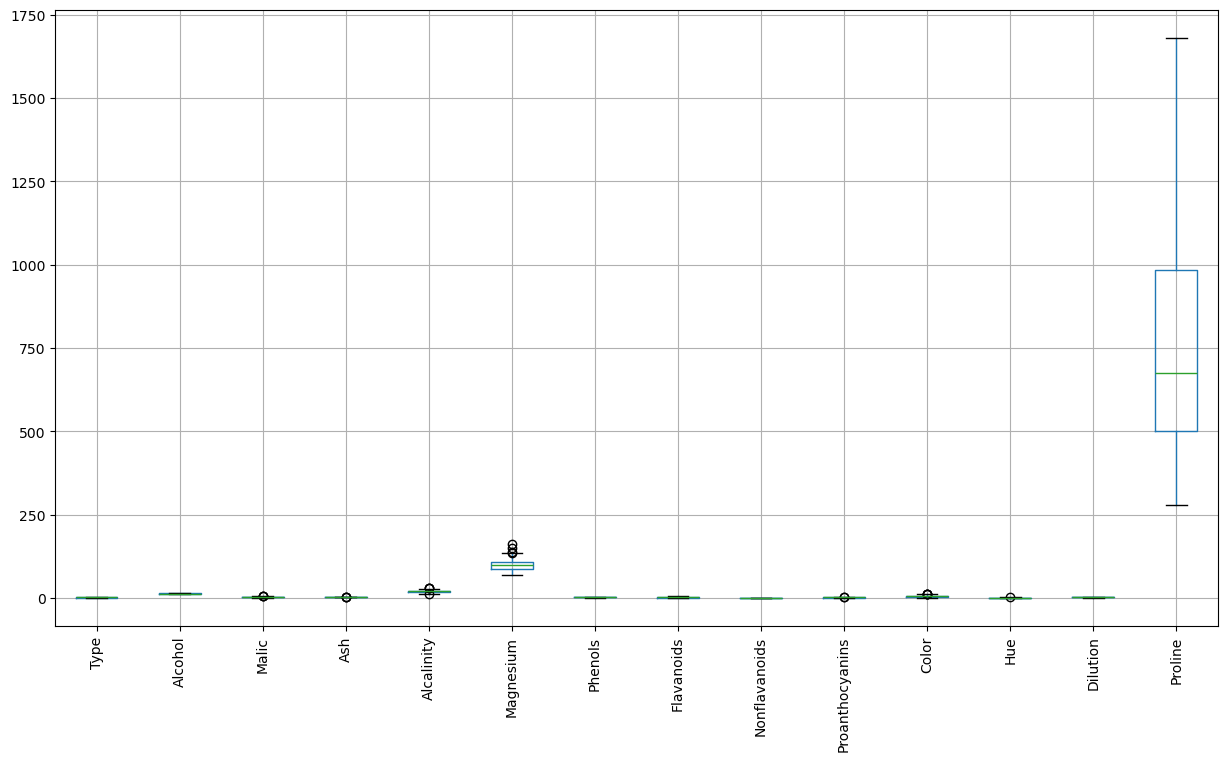

In [6]:
# Boxplots (Outlier Detection)
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


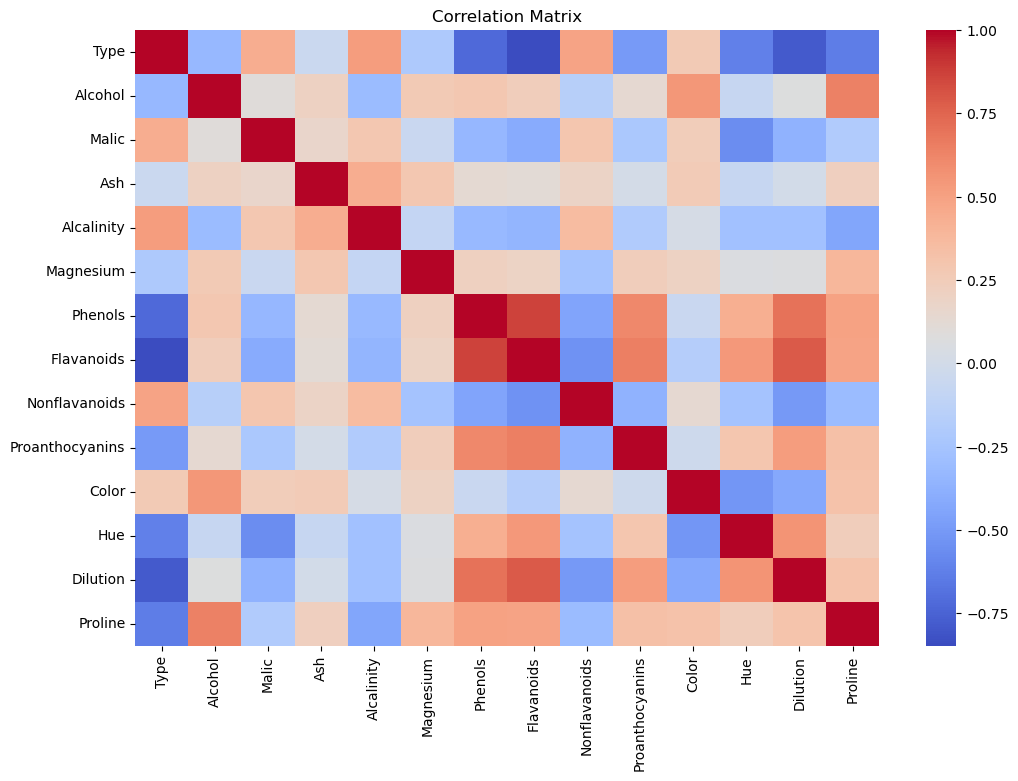

In [7]:
# STEP 5: Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [8]:
# TASK 2: PCA – Dimensionality Reduction
# STEP 6: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [9]:
# STEP 7: Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


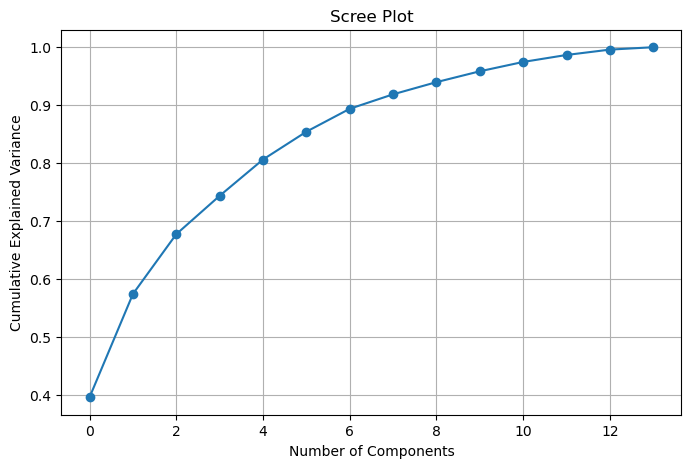

In [10]:
# STEP 8: Scree Plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


In [11]:
# STEP 9: PCA with Optimal Components (2 PCs)
pca_final = PCA(n_components=2)
pca_final_data = pca_final.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_final_data, columns=["PC1", "PC2"])
pca_df.head()


,PC1,PC2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


In [12]:
# TASK 3: Clustering on Original Data
# STEP 10: KMeans on Original Data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# STEP 11: Evaluate Clustering (Original Data)
print("Silhouette Score (Original):", silhouette_score(scaled_data, clusters_original))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(scaled_data, clusters_original))


Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


In [14]:
# TASK 4: Clustering on PCA Data
# STEP 12: KMeans on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_df)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# STEP 13: Evaluate Clustering (PCA Data)
print("Silhouette Score (PCA):", silhouette_score(pca_df, clusters_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_df, clusters_pca))


Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


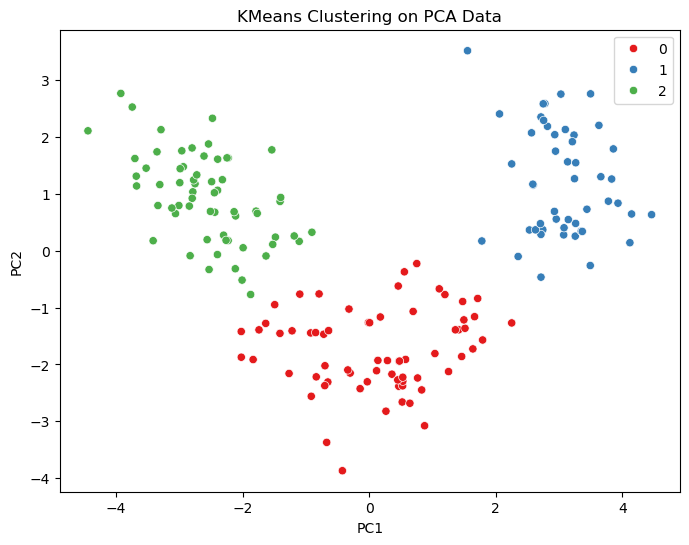

In [16]:
# STEP 14: PCA Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue=clusters_pca, palette="Set1", data=pca_df)
plt.title("KMeans Clustering on PCA Data")
plt.show()


# 📊 TASK 5: Comparison & Analysis
Observations :
PCA reduced dimensionality while retaining most variance

PCA-based clustering shows better separation

Noise & redundant features reduced after PCA

Clustering performance improved after PCA

In [ ]:
# TASK 6: Conclusion & Insights 

You can directly write this 👇:

PCA effectively reduced the dimensionality of the Wine dataset while preserving maximum variance. Clustering on PCA-transformed data resulted in better-defined clusters compared to clustering on original high-dimensional data. PCA improves computational efficiency, visualization, and clustering performance by removing correlated and redundant features. PCA is recommended when datasets have high dimensionality and multicollinearity.